# Solving ODEs Using Laplace Transformations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy

# For nicely displayed output from SymPy, we need to initialize its printing system
sympy.init_printing()

Differential equations and Linear Algebra by Gil. String page 141

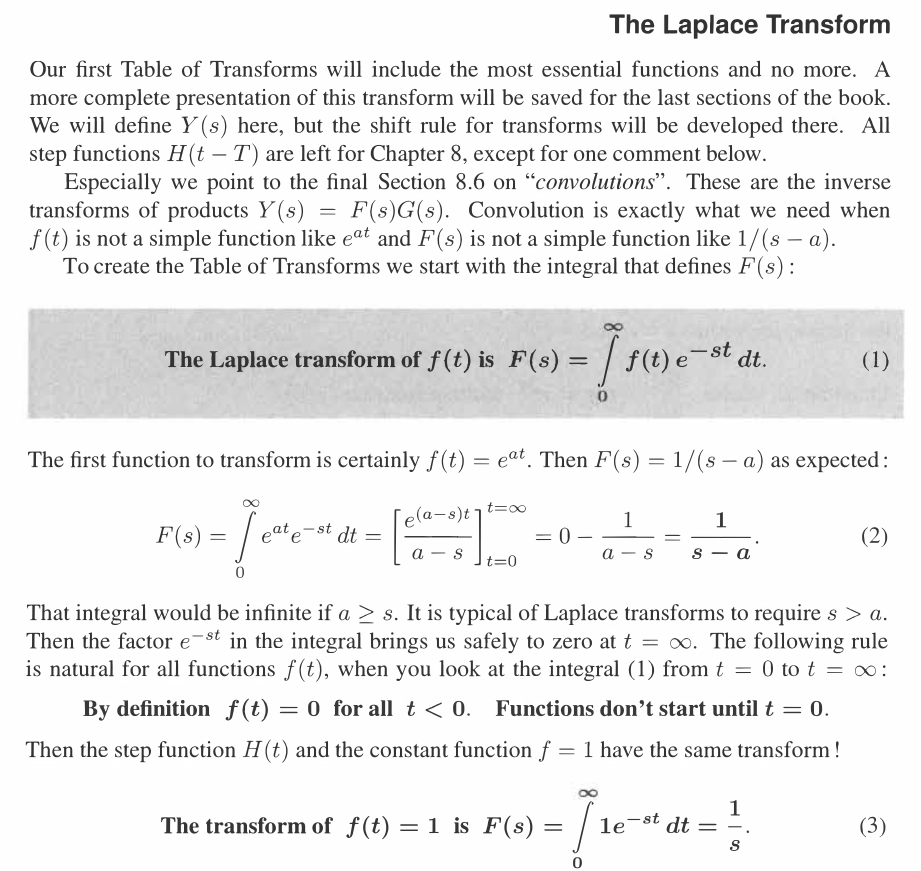

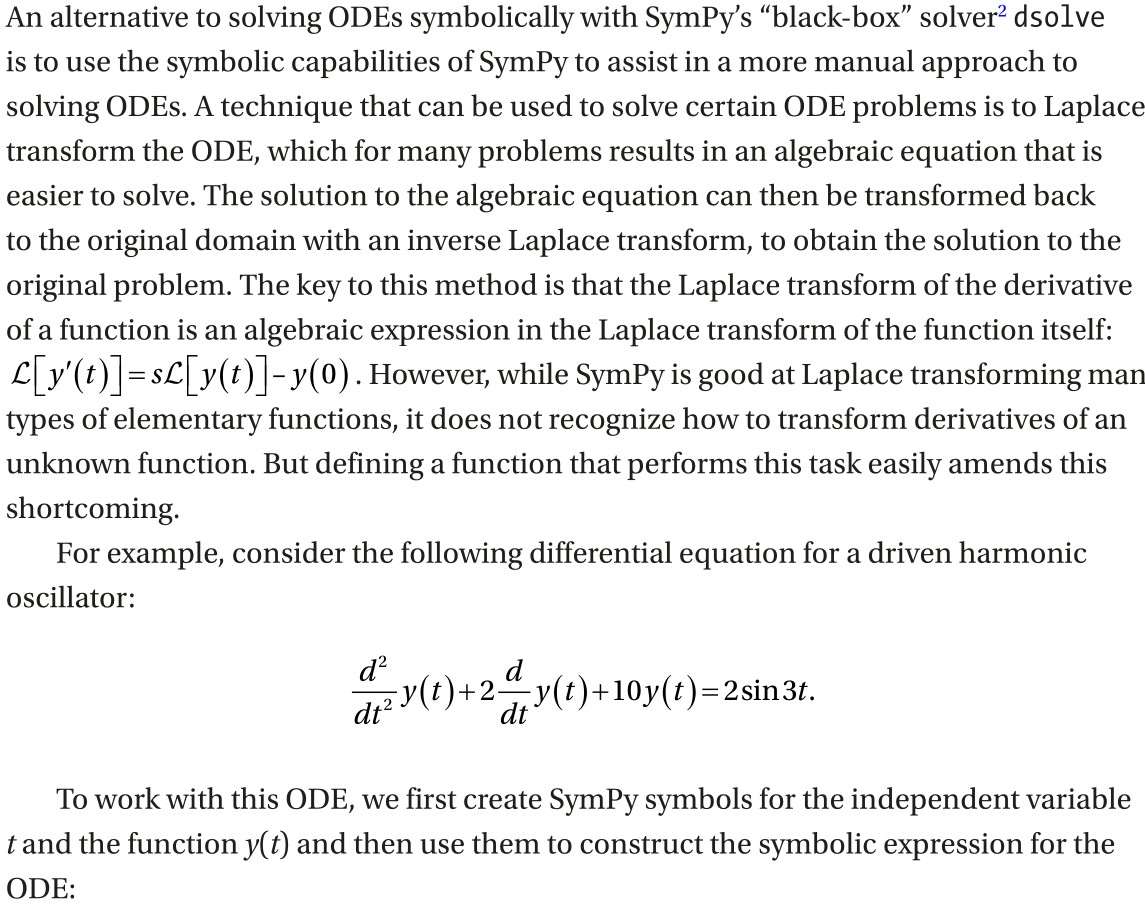

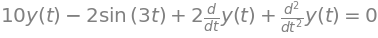

In [22]:
t = sympy.symbols("t", positive=True)
y = sympy.Function("y")

ode = y(t).diff(t, 2) + 2 * y(t).diff(t) + 10 * y(t) - 2 * sympy.sin(3*t)

sympy.Eq(ode, 0)

> Laplace transforming this ODE should yield an algebraic equation. To pursue this
approach using SymPy and its function `sympy.laplace_transform`, we first need to create
a symbol `s`, to be used in the Laplace transformation. At this point we also create a
symbol `Y` for later use

In [30]:
s, Y = sympy.symbols("s, Y", real=True)

> Next we proceed to Laplace transform the unknown function `y(t)`, as well as the
entire ODE equation

In [31]:
L_y = sympy.laplace_transform(y(t), t, s)
L_y

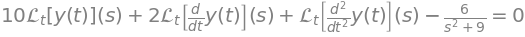

In [32]:
L_ode = sympy.laplace_transform(ode, t, s, noconds=True)
sympy.Eq(L_ode, 0)

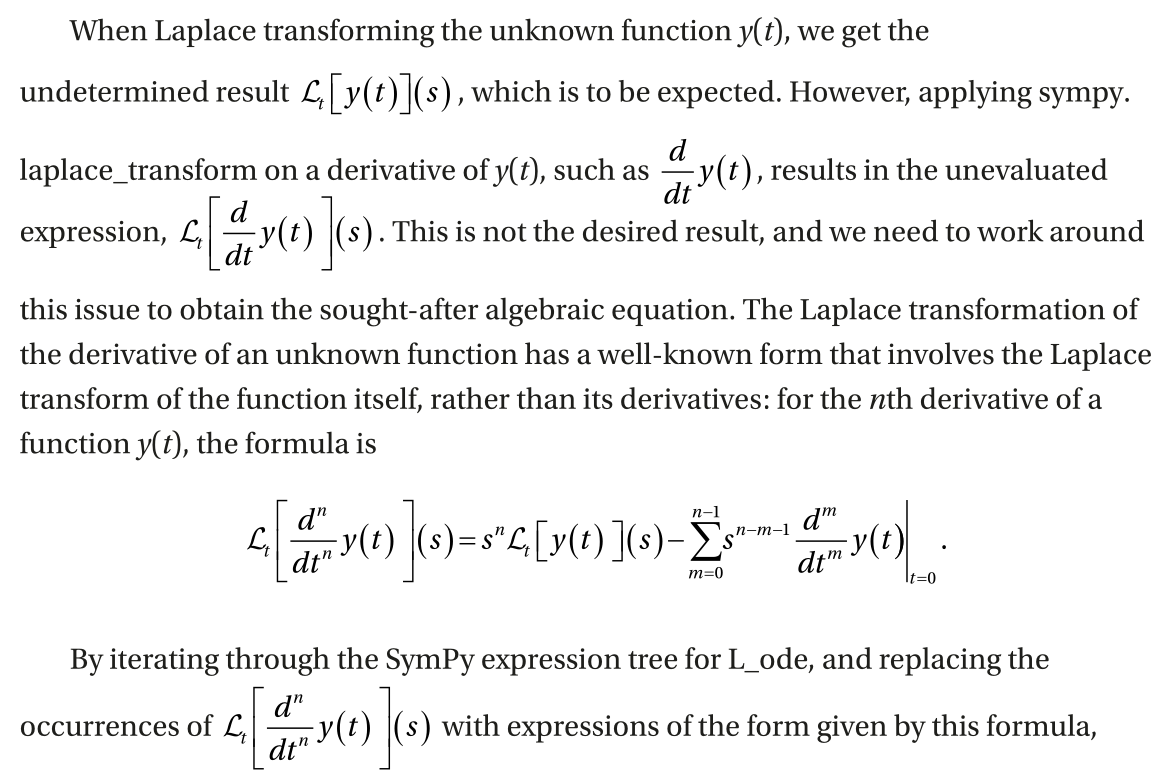

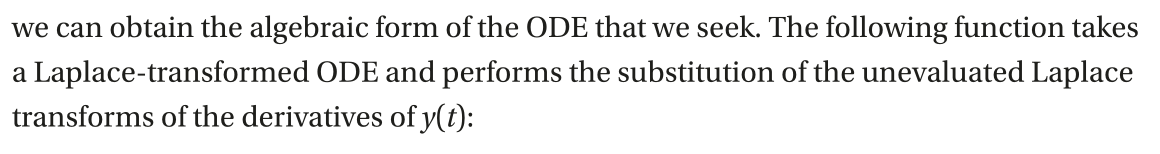

In [33]:
def laplace_transform_derivatives(e):
    """
    Evaluate laplace transforms of derivatives of functions
    """
    if isinstance(e, sympy.LaplaceTransform):
        if isinstance(e.args[0], sympy.Derivative):
            d, t, s = e.args
            n = len(d.args)
            return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s) - 
                    sum([s**(n-i) * sympy.diff(d.args[0], t, i-1).subs(t, 0) for i in range(1, n+1)]))
    if isinstance(e, (sympy.Add, sympy.Mul)):
        t = type(e)
        return t(*[laplace_transform_derivatives(arg) for arg in e.args])
    return e

In [34]:
L_ode_2 = laplace_transform_derivatives(L_ode)
sympy.Eq(L_ode_2, 0)

   2                                                                               ⎛d       ⎞│        6       
3⋅s ⋅LaplaceTransform(y(t), t, s) - 3⋅s⋅y(0) + 10⋅LaplaceTransform(y(t), t, s) - 3⋅⎜──(y(t))⎟│    - ────── = 0
                                                                                   ⎝dt      ⎠│t=0    2        
                                                                                                    s  + 9    

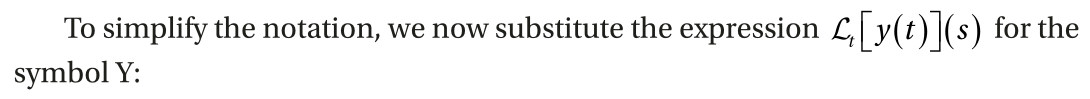

In [35]:
L_ode_3 = L_ode_2.subs(L_y, Y)

sympy.Eq(L_ode_3, 0)

     2                       ⎛d       ⎞│        6       
3⋅Y⋅s  + 10⋅Y - 3⋅s⋅y(0) - 3⋅⎜──(y(t))⎟│    - ────── = 0
                             ⎝dt      ⎠│t=0    2        
                                              s  + 9    

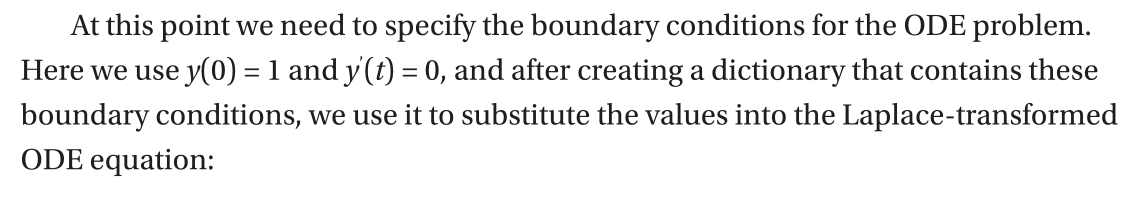

In [36]:
ics = {y(0): 1, y(t).diff(t).subs(t, 0): 0}
ics

⎧         ⎛d       ⎞│      ⎫
⎨y(0): 1, ⎜──(y(t))⎟│   : 0⎬
⎩         ⎝dt      ⎠│t=0   ⎭

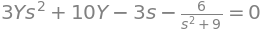

In [37]:
L_ode_4 = L_ode_3.subs(ics)
sympy.Eq(L_ode_4, 0)

> This is an algebraic equation that can be solved for `Y`

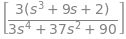

In [38]:
Y_sol = sympy.solve(L_ode_4, Y)
Y_sol

> The result is a list of solutions, which in this case contains only one element.
Performing the inverse Laplace transformation on this expression gives the solution to
the original problem in the time domain

In [41]:
y_sol = sympy.inverse_laplace_transform(Y_sol[0], s, t)
sympy.simplify(y_sol)

> This technique of Laplace transforming an ODE, solving the corresponding algebraic
equation, and inverse Laplace transforming the result to obtain the solution to the
original problem can be applied to solve many important ODE problems that arise in,
for example, electrical engineering and process control applications. Although these
problems can be solved by hand with the help of Laplace transformation tables, using
SymPy has the potential of significantly simplifying the process